In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, find_peaks, butter, filtfilt
import IPython.display as ipd

In [2]:
# Load the audio file
file_path = '/kaggle/input/heartbeat-sounds/set_a/normal__201101151127.wav'  # example path
audio, sr = librosa.load(file_path, sr=None)

# Play the audio
ipd.Audio(audio, rate=sr)

In [3]:
# Butterworth Bandpass Filter function
def butter_bandpass_filter(signal, lowcut=20, highcut=400, fs=1000, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

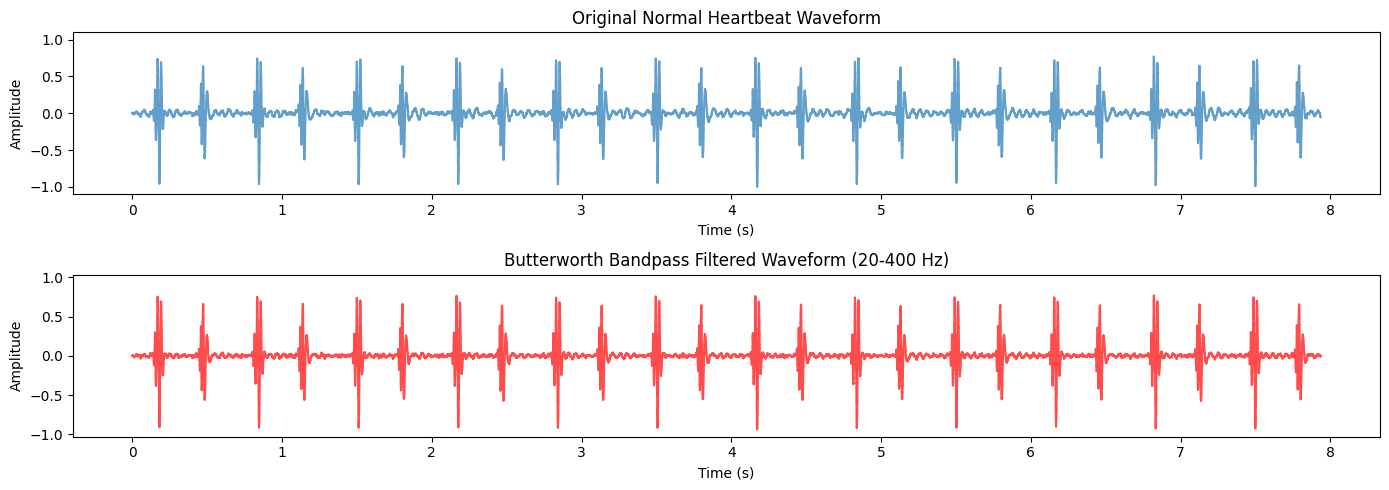

In [4]:
# Load audio file and resample
file_path = "/kaggle/input/heartbeat-sounds/set_a/normal__201108011118.wav"
audio, sr = librosa.load(file_path, sr=1000)  # resample to 1000 Hz
audio = audio / np.max(np.abs(audio))         # normalize

# Apply Butterworth filter
filtered_audio = butter_bandpass_filter(audio, lowcut=20, highcut=400, fs=sr, order=4)

# Plot original and filtered waveforms
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr, alpha=0.7)
plt.title("Original Normal Heartbeat Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
librosa.display.waveshow(filtered_audio, sr=sr, color='r', alpha=0.7)
plt.title("Butterworth Bandpass Filtered Waveform (20-400 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

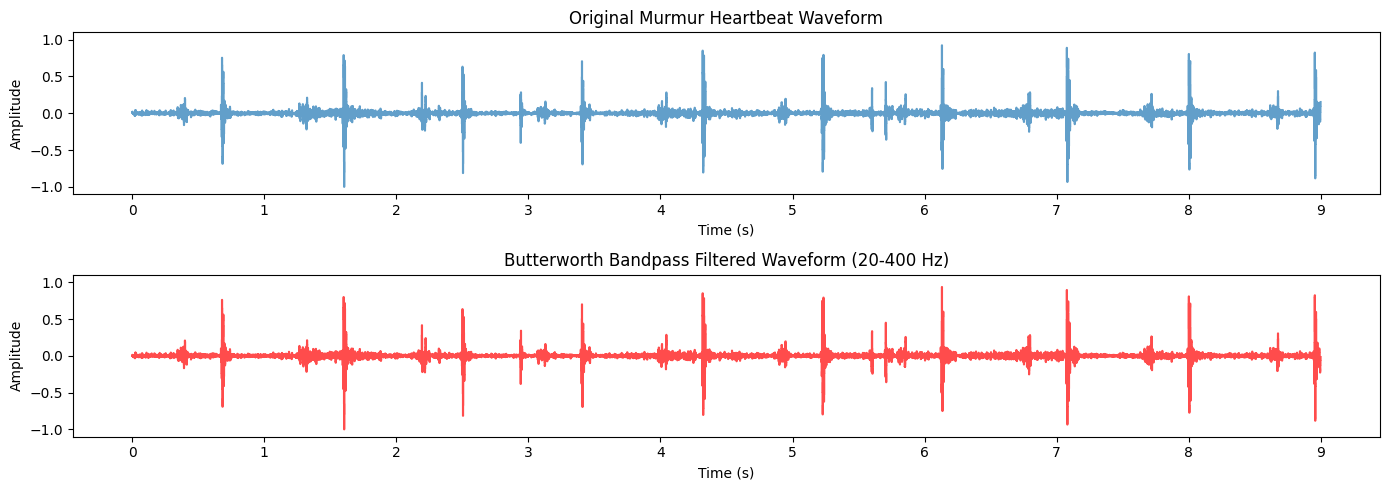

In [5]:
# Load audio file and resample
file_path = "/kaggle/input/heartbeat-sounds/set_a/murmur__201102052338.wav"
audio, sr = librosa.load(file_path, sr=1000)  # resample to 1000 Hz
audio = audio / np.max(np.abs(audio))         # normalize

# Apply Butterworth filter
filtered_audio = butter_bandpass_filter(audio, lowcut=20, highcut=400, fs=sr, order=4)

# Plot original and filtered waveforms
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr, alpha=0.7)
plt.title("Original Murmur Heartbeat Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
librosa.display.waveshow(filtered_audio, sr=sr, color='r', alpha=0.7)
plt.title("Butterworth Bandpass Filtered Waveform (20-400 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

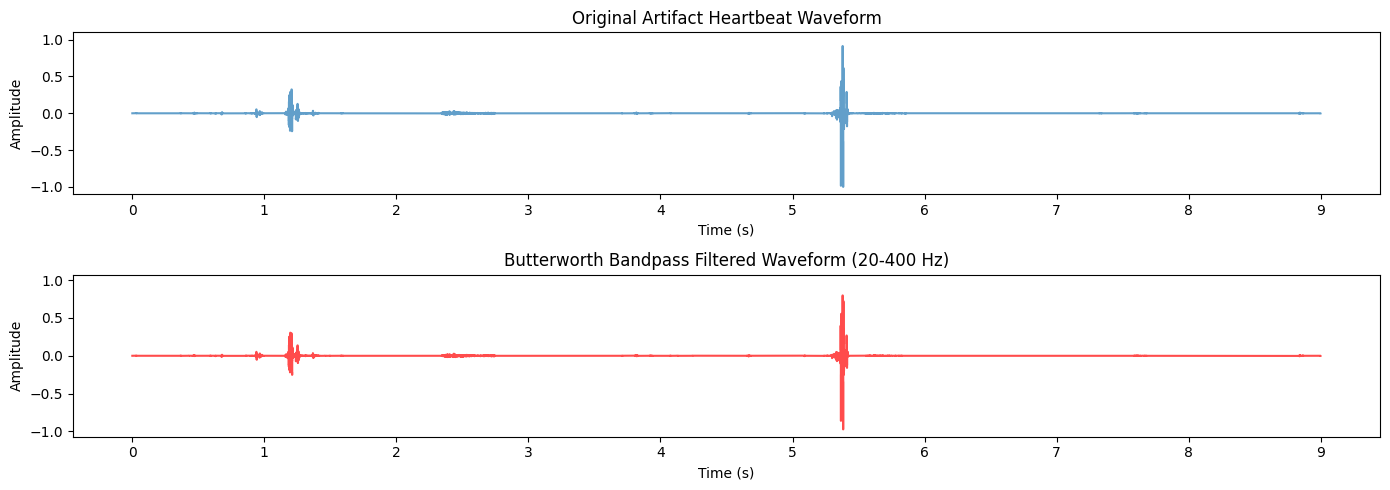

In [6]:
# Load audio file and resample
file_path = "/kaggle/input/heartbeat-sounds/set_a/artifact__201012172012.wav"
audio, sr = librosa.load(file_path, sr=1000)  # resample to 1000 Hz
audio = audio / np.max(np.abs(audio))         # normalize

# Apply Butterworth filter
filtered_audio = butter_bandpass_filter(audio, lowcut=20, highcut=400, fs=sr, order=4)

# Plot original and filtered waveforms
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr, alpha=0.7)
plt.title("Original Artifact Heartbeat Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
librosa.display.waveshow(filtered_audio, sr=sr, color='r', alpha=0.7)
plt.title("Butterworth Bandpass Filtered Waveform (20-400 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

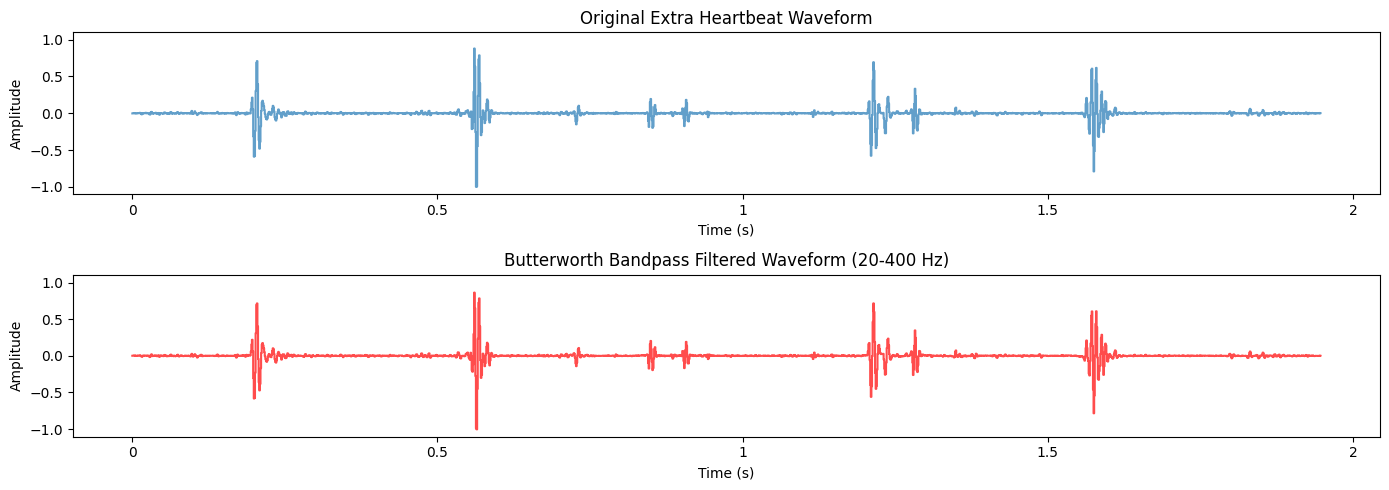

In [7]:
# Load audio file and resample
file_path = "/kaggle/input/heartbeat-sounds/set_a/extrahls__201104140118.wav"
audio, sr = librosa.load(file_path, sr=1000)  # resample to 1000 Hz
audio = audio / np.max(np.abs(audio))         # normalize

# Apply Butterworth filter
filtered_audio = butter_bandpass_filter(audio, lowcut=20, highcut=400, fs=sr, order=4)

# Plot original and filtered waveforms
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr, alpha=0.7)
plt.title("Original Extra Heartbeat Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
librosa.display.waveshow(filtered_audio, sr=sr, color='r', alpha=0.7)
plt.title("Butterworth Bandpass Filtered Waveform (20-400 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

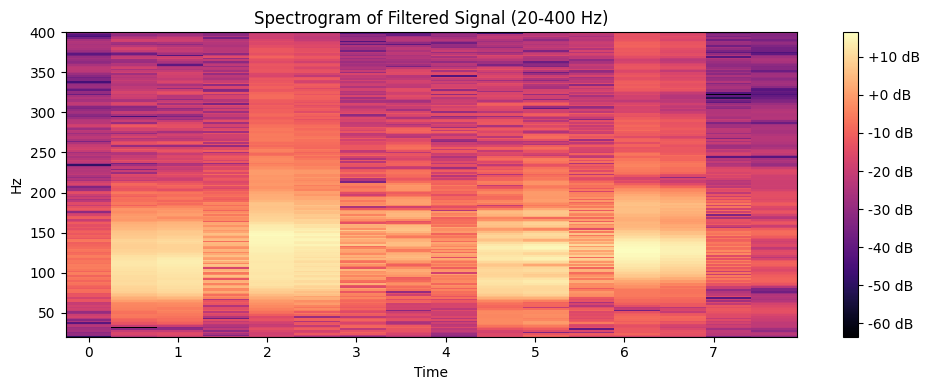

In [8]:
# Spectrogram of filtered signal
X = librosa.stft(filtered_audio, n_fft=512)
X_db = librosa.amplitude_to_db(np.abs(X))

plt.figure(figsize=(10, 4))
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='linear', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Filtered Signal (20-400 Hz)")
plt.ylim(20, 400)
plt.tight_layout()
plt.show()

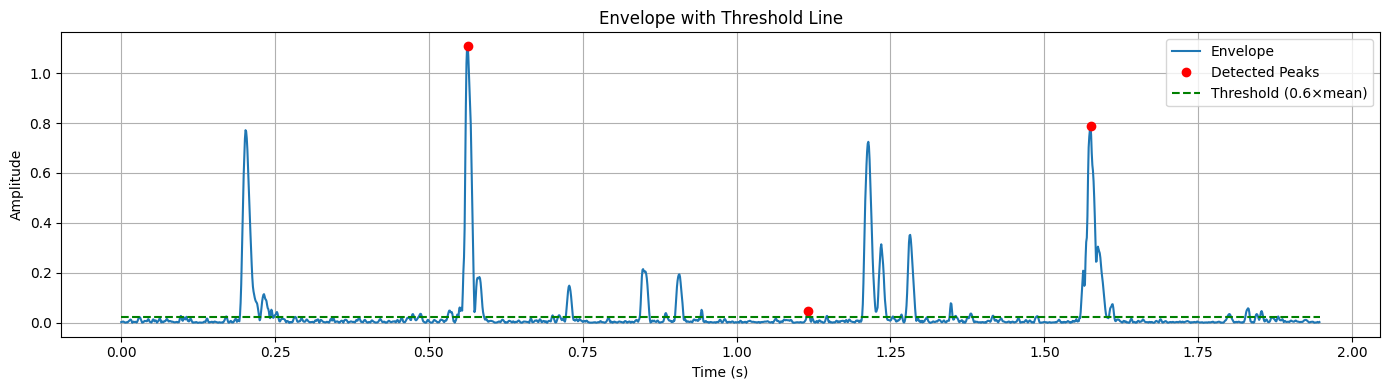

Total peaks detected: 3


In [9]:
signal = filtered_audio  # already resampled and normalized

# Hilbert transform to compute envelope
analytic_signal = hilbert(signal)
envelope = np.abs(analytic_signal)

# Peak detection on envelope
peaks, _ = find_peaks(
    envelope,
    distance=int(0.4 * sr),        # avoid detecting peaks <400ms apart
    height=np.mean(envelope) * 1.2 # suppress weak peaks
)

# Convert to seconds for plotting
peak_times = peaks / sr

# Plot envelope and mark peaks
plt.figure(figsize=(14, 4))
plt.plot(np.arange(len(envelope)) / sr, envelope, label='Envelope')
plt.plot(peak_times, envelope[peaks], 'ro', label='Detected Peaks')  # red dots at peaks
plt.hlines(np.mean(envelope) * 0.6, 0, len(envelope) / sr, colors='g', linestyles='--', label='Threshold (0.6×mean)')
plt.title("Envelope with Threshold Line")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Total peaks detected: {len(peaks)}")

Extracted 1 cardiac cycles.


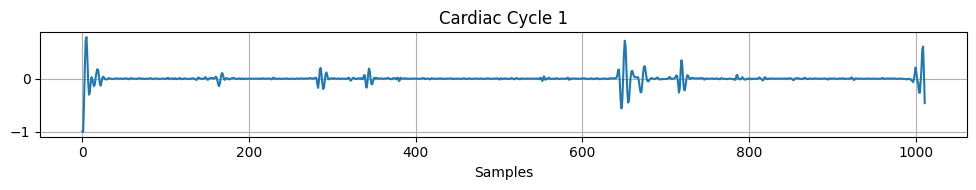

In [10]:
# Segment cardiac cycles from S1 to next S1 (every 2 peaks)
cardiac_cycles = []
for i in range(len(peaks) - 2):
    start = peaks[i]
    end = peaks[i + 2]
    cycle = signal[start:end]
    cardiac_cycles.append(cycle)

print(f"Extracted {len(cardiac_cycles)} cardiac cycles.")

# Visualize a few cardiac cycles
for i, cycle in enumerate(cardiac_cycles[:3]):
    plt.figure(figsize=(10, 2))
    plt.plot(cycle)
    plt.title(f"Cardiac Cycle {i+1}")
    plt.xlabel("Samples")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

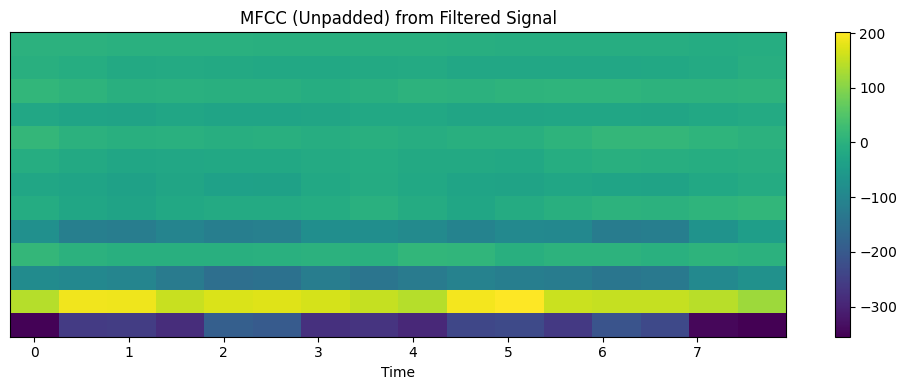

In [11]:
# MFCC extraction from filtered signal
mfcc = librosa.feature.mfcc(y=filtered_audio, sr=sr, n_mfcc=13, n_fft=512, hop_length=128)

# Plot MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap='viridis')
plt.colorbar()
plt.title("MFCC (Unpadded) from Filtered Signal")
plt.tight_layout()
plt.show()